In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("data.csv")
print(df.describe())

        enrollee_id  city_development_index    experience  training_hours  \
count  19158.000000            18679.000000  19093.000000    18392.000000   
mean   16875.358179                0.828951      9.928036       65.185787   
std     9616.292592                0.123334      6.505268       59.885626   
min        1.000000                0.448000      0.000000        1.000000   
25%     8554.250000                0.740000      4.000000       23.000000   
50%    16982.500000                0.903000      9.000000       47.000000   
75%    25169.750000                0.920000     16.000000       88.000000   
max    33380.000000                0.949000     20.000000      336.000000   

             target  
count  19158.000000  
mean       0.249348  
std        0.432647  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [11]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [12]:
len(df)

19158

In [13]:
df.shape

(19158, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [15]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [17]:
df['education_level'].values_counts()

AttributeError: 'Series' object has no attribute 'values_counts'

In [18]:
df['gender'].isnull().sum()/len(df['gender'])

0.23530639941538783

In [19]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [20]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]

In [21]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [22]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
11328,0.884,no_enrollment,Masters,16.0,98.0
17894,0.920,no_enrollment,Graduate,20.0,19.0
1077,0.926,no_enrollment,NaN,3.0,47.0
13076,NaN,no_enrollment,Graduate,17.0,16.0
17172,0.740,Full time course,Graduate,5.0,326.0


In [23]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

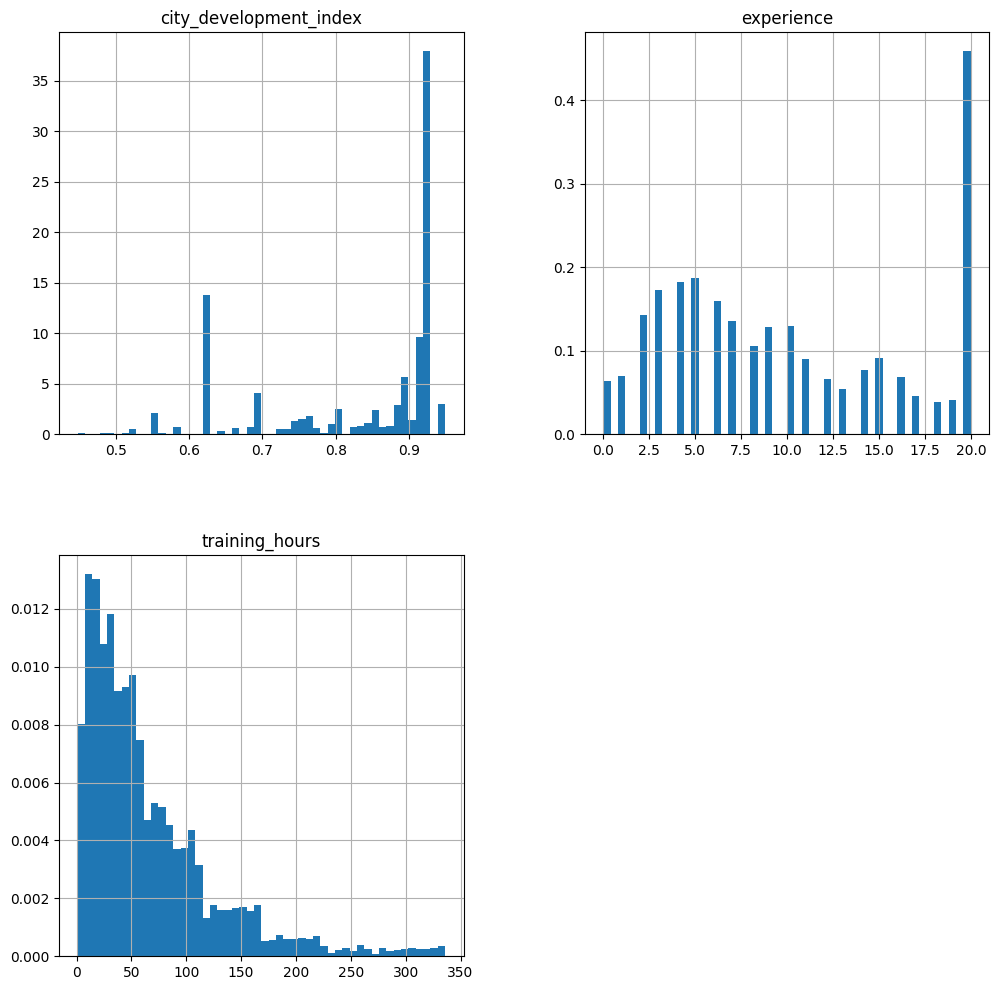

In [24]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

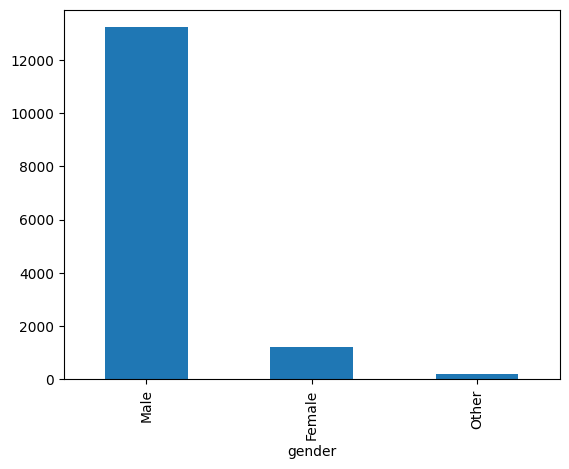

In [25]:
df['gender'].value_counts().plot(kind='bar')
plt.show()

In [26]:
df['gender'].isnull().sum()

4508

In [27]:
new_df['gender'].isnull().sum()

KeyError: 'gender'